# PyFilterBank調査

In [1]:
import pyfilterbank.octbank as oct
import numpy as np
import matplotlib.pyplot as plt

# 信号の作成

[Text(0.5, 0, 'Time[s]'), Text(0, 0.5, 'Amplitude'), Text(0.5, 1.0, 'Data')]

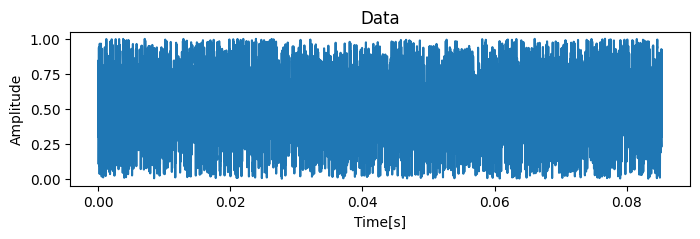

In [2]:
fs = 48000
n = 4096
data = np.random.rand(n)
time = np.arange(n)/fs

_,ax = plt.subplots(figsize=(8,2))
ax.plot(time,data)
ax.set(xlabel='Time[s]',ylabel='Amplitude',title='Data')

# 周波数解析

[Text(0.5, 0, 'Frequency[Hz]'),
 Text(0, 0.5, 'Power'),
 Text(0.5, 1.0, 'power_spec')]

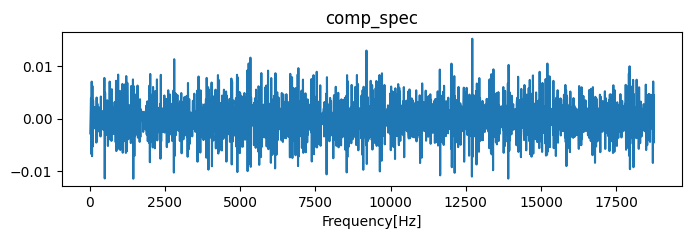

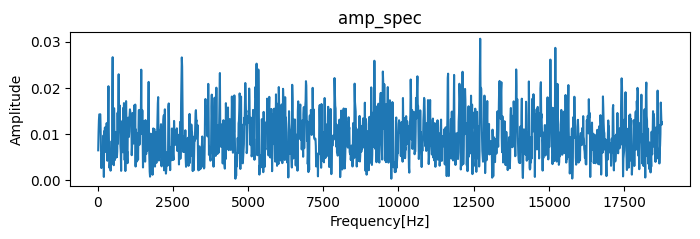

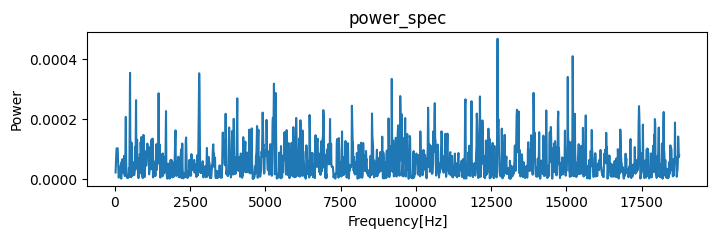

In [3]:
window = np.hanning(n)
n_fft = n
f_range = int(n_fft/2.56)+1
freq = np.fft.rfftfreq(n_fft,1/fs)[:f_range]

windowed_data = data * window

comp_spec = np.fft.rfft(a=windowed_data,n=n_fft,norm='forward')
comp_spec = (comp_spec/np.mean(window))[:f_range]

amp_spec = np.abs(comp_spec)
amp_spec[1:] *= 2

power_spec = np.abs(comp_spec)**2
power_spec[1:] *= 2

_,ax = plt.subplots(figsize=(8,2))
ax.plot(freq[2:],np.real(comp_spec)[2:])
ax.set(xlabel='Frequency[Hz]',ylabel='',title='comp_spec')

_,ax = plt.subplots(figsize=(8,2))
ax.plot(freq[2:],amp_spec[2:])
ax.set(xlabel='Frequency[Hz]',ylabel='Amplitude',title='amp_spec')

_,ax = plt.subplots(figsize=(8,2))
ax.plot(freq[2:],power_spec[2:])
ax.set(xlabel='Frequency[Hz]',ylabel='Power',title='power_spec')

# 1/3オクターブ解析

In [8]:
ofb = oct.FractionalOctaveFilterbank(sample_rate=fs)
x,y = ofb.filter(data)

AttributeError: function/symbol 'sosfilter_double' not found in library '/home/vscode/.local/lib/python3.8/site-packages/pyfilterbank/sosfilt.so': /home/vscode/.local/lib/python3.8/site-packages/pyfilterbank/sosfilt.so: undefined symbol: sosfilter_double